**Identification**

To identify the Cardio Vascular Disease

**IMPORT DRIVE**

In [ ]:
#connecting google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**IMPORT LIBRARIES**

In [ ]:
#importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn
import sklearn

**READ THE PATH OF THE**

In [ ]:
#Importing and reading the dataset
data = pd.read_csv("/content/drive/MyDrive/cardio_train-_1_11.csv")

In [ ]:
#displaying the first n rows
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Checking if there's NULL value in any of the cells.

In [ ]:
#getting info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values

In [ ]:
#returns a DataFrame object where all the values are replaced with a Boolean value True for NULL values.
data.isnull().sum(axis = 0)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The patients age is written in days, so we're converting it to years and rounding it to the nearest 2 decimals. Also we're replacing the gender column with another two-columns, one for male and the other is for female. If the patients' gender is male then a value of 1 will be inside the male column and zero inside the female column and vice-versa.

In [ ]:
data.insert(3, "female", (data['gender']==1).astype(int))
data.insert(4, 'male', (data['gender']==2).astype(int))
data.drop(['gender', 'id'], axis=1, inplace=True)

Down here, we're calculating the patient BMI (Body Mass Index) using the formula which is:  weight/height^2
 
In our dataset, the height of patients were in centimeters so we divided it by 100 to convert it into meters.

In [ ]:
#Data insertion is the process of inserting rows into a table
data.insert(5, 'bmi', round((data['weight']/(data['height']/100)**2), 2)) 

In [ ]:
#method returns description of the data in the DataFrame.
data.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.650429,0.349571,164.359229,74.205690,27.556545,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,0.476838,8.210126,14.395757,6.091405,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,0.000000,165.000000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,1.000000,170.000000,82.000000,30.220000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The mean age for patients is 53.
The percentage of males is 35.
The percentage of females is 65.
The percentage of smokers is 8.
The percentage of alcoholists is 5.
The percentage of patients who do sports is 80





It seems there are many outliers in body mass index, may be it's a mistake. So, lets drop outliers

In [ ]:
#dropping the paticular column
data.drop(data.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [ ]:
#library function used for testing, training and spliting the dataset
from sklearn.model_selection import train_test_split

we created a function that adds a column called bp_cat (Blood Pressure Category). This function scans two columns of each row which are the ap_hi and ap_lo then based on the values of these columns it categorizes the patients blood pressure as Normal, Elevated, High Blood Pressure Stage 1, High Blood Pressure Stage 2 or Hypertensive Crisis.

In [ ]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
data.insert(8, "bp_cat", data.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
data['bp_cat'].value_counts()

normal      39008
high 1      15380
high 2      15023
elevated      419
high 3         77
Name: bp_cat, dtype: int64

We can also drop outliers from blood pressure variables

In [ ]:
data.drop(data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [ ]:
data.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio
0,18393,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0
1,20228,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1
2,18857,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1
3,17623,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1
4,17474,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0


we've finished cleaning and sorting our dataset according to our needs.

visualizing of cases occurs according to the age

In [ ]:
from matplotlib import rcParams

In [ ]:
data['years'] = (data['age'] / 360).round().astype('int')

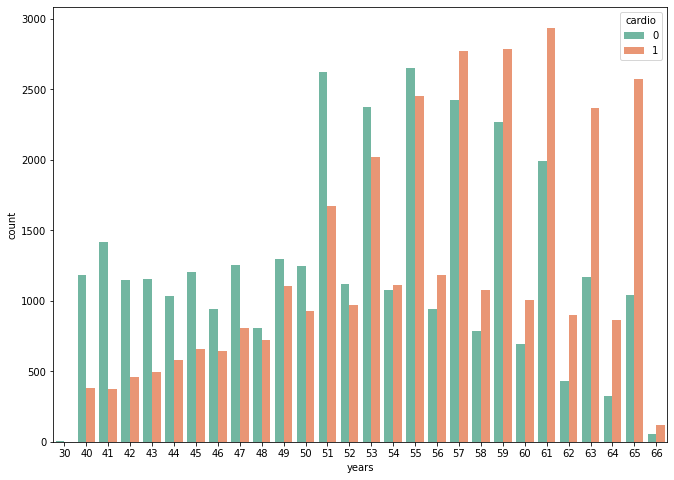

In [ ]:
#used to Show the counts of observations in each categorical bin using bars
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

visualizing of cases occurs according to the gender

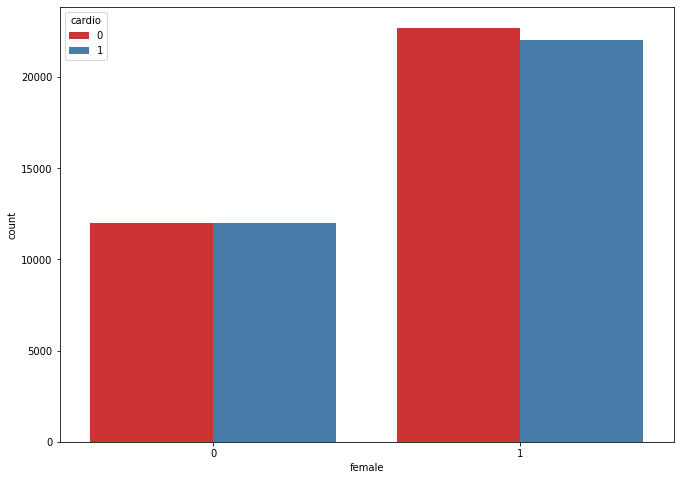

In [ ]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='female', hue='cardio', data = data, palette="Set1");

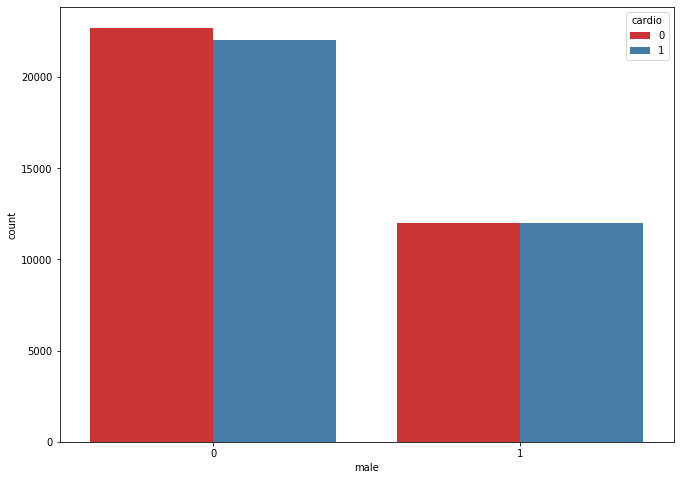

In [ ]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='male', hue='cardio', data = data, palette="Set1");

How many Smokers and Non-Smokers

In [ ]:
num = data["smoke"].value_counts("0")
num

0    0.911965
1    0.088035
Name: smoke, dtype: float64

In [ ]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print(f"There are  {int(num_ns)}  Non-Smokers and  {int(num_s)}  Smokers in the data set.")

There are  63830  Non-Smokers and  6169  Smokers in the data set.


we're defining a variable of standard and unique color for the visualization to avoid distraction to the user.For that import seaborn package.


In [ ]:
import seaborn as sb

In [ ]:
base_color = sb.color_palette()[0]

In [ ]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

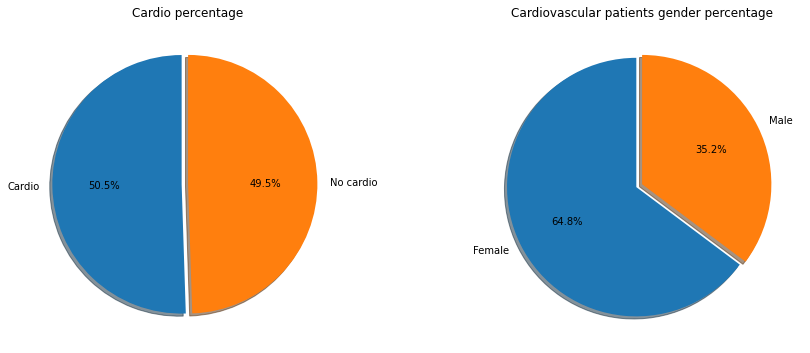

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=data['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = data.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

The percentage of people with cardiovascular diseases is 50%.
The percentage of males with cardiovascular diseases is 35.3%.
The percentage of females with cardiovascular diseases is 64.7%.

making boxplots to compare the age and body mass index for the cardio and non-cardio patients.

Text(0.5, 69.0, '')

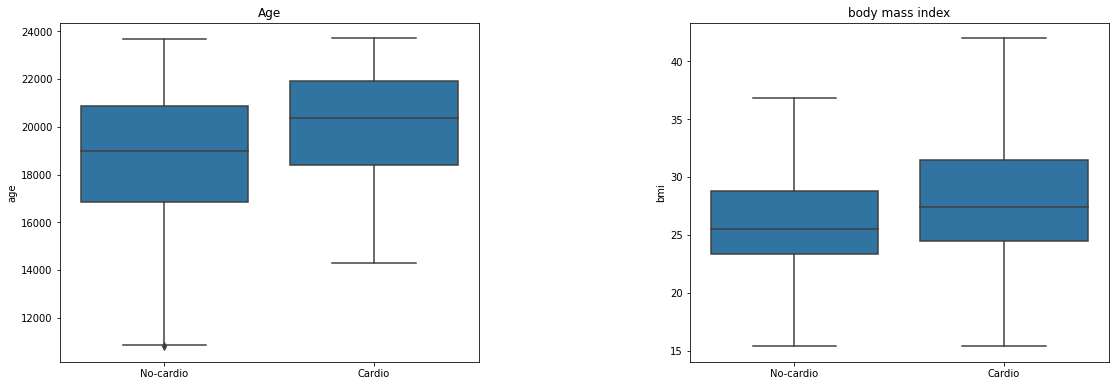

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=data, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=data, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

A relation is found between the age of people and cardiovascular diseases, thus, elderly people are most likely to have this kind of diseases.
Another relation is found between the BMI and cardiovascular diseases, thus, people with higher BMI are also most likely to to have this kind of diseases.

Probability that a person has cardio diseases given that he is 50 or older

In [ ]:
data_age_50 = data.query('age >=50')
data_agy_50_cardio = data_age_50.query('cardio==1')
round(data_agy_50_cardio.shape[0]*100/data_age_50.shape[0],2)

49.49

Probability that a person drinks alcohol or smokes

In [ ]:
data_cohol_smoke = data.query("alco==1 or smoke==1")
print(data_cohol_smoke.shape[0]*100/data.shape[0])

11.524964689779694


 A person has cardio diseases given that the patient drinks alcohol or smokes

In [ ]:
data_cohol_smoke_cadrio = data_cohol_smoke.query('cardio==1')
data_cohol_smoke_cadrio.shape[0]*100/data_cohol_smoke.shape[0]

47.95957043588124

In [ ]:
a=data.drop("bp_cat",axis=1)
a.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,0,1,168,62.0,21.97,110,80,1,1,0,0,1,0,51
1,20228,1,0,156,85.0,34.93,140,90,3,1,0,0,1,1,56
2,18857,1,0,165,64.0,23.51,130,70,3,1,0,0,0,1,52
3,17623,0,1,169,82.0,28.71,150,100,1,1,0,0,1,1,49
4,17474,1,0,156,56.0,23.01,100,60,1,1,0,0,0,0,49


In [ ]:
a.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,18393,0,1,168,62.0,21.97,110,80,1,1,0,0,1,0,51
1,20228,1,0,156,85.0,34.93,140,90,3,1,0,0,1,1,56
2,18857,1,0,165,64.0,23.51,130,70,3,1,0,0,0,1,52
3,17623,0,1,169,82.0,28.71,150,100,1,1,0,0,1,1,49
4,17474,1,0,156,56.0,23.01,100,60,1,1,0,0,0,0,49


In [ ]:
a.isnull().sum(axis = 0)

age            0
female         0
male           0
height         0
weight         0
bmi            0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
dtype: int64

In [ ]:

df_features = a.iloc[:, a.columns != 'cardio']
# consider the target variable
df_target = a.iloc[:,a.columns == 'cardio']

In [ ]:

class_frequency = df_target.cardio.value_counts()
class_frequency

0    34691
1    33986
Name: cardio, dtype: int64

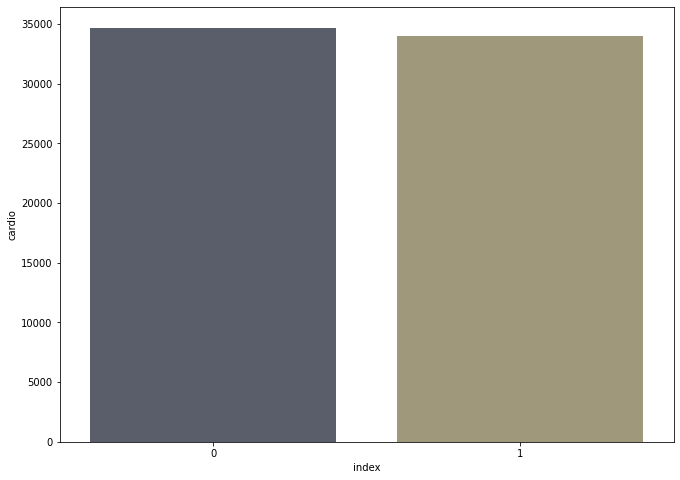

In [ ]:
xx = a['cardio'].value_counts().reset_index()
sns.barplot(x = "index", y = "cardio", data=xx, palette = "cividis");

In [ ]:
X=a.drop("cardio", axis=1)
X.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years
0,18393,0,1,168,62.0,21.97,110,80,1,1,0,0,1,51
1,20228,1,0,156,85.0,34.93,140,90,3,1,0,0,1,56
2,18857,1,0,165,64.0,23.51,130,70,3,1,0,0,0,52
3,17623,0,1,169,82.0,28.71,150,100,1,1,0,0,1,49
4,17474,1,0,156,56.0,23.01,100,60,1,1,0,0,0,49


In [ ]:
Y=a["cardio"]
Y.head()


0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [ ]:
#training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [ ]:
#evaluate how the classifier performs on the training set with . score(X_train, Y_train) evaluate how the classifier perform on the test
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
y_test.head()

42152    1
23527    0
479      1
57686    1
68582    0
Name: cardio, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.7090128130460105

In [ ]:
cm

array([[5497, 1395],
       [2602, 4242]])

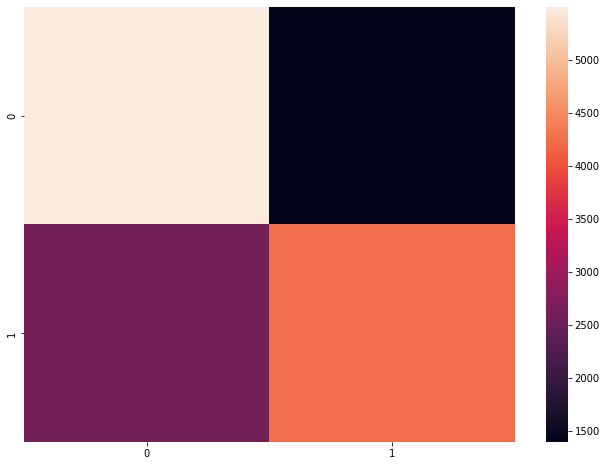

In [ ]:
seaborn.heatmap(cm)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
knn = KNN(n_neighbors = 3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print('Model is Created')

Model is Created


In [ ]:
y_pred = knn.predict(X_test)

y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
ac

0.6644583576004659

In [ ]:
cm

array([[4698, 2194],
       [2415, 4429]])

In [ ]:
X = a.drop('cardio',axis=1)
y = a.cardio
X

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years
0,18393,0,1,168,62.0,21.97,110,80,1,1,0,0,1,51
1,20228,1,0,156,85.0,34.93,140,90,3,1,0,0,1,56
2,18857,1,0,165,64.0,23.51,130,70,3,1,0,0,0,52
3,17623,0,1,169,82.0,28.71,150,100,1,1,0,0,1,49
4,17474,1,0,156,56.0,23.01,100,60,1,1,0,0,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,0,1,168,76.0,26.93,120,80,1,1,1,0,1,53
69996,22601,1,0,158,126.0,50.47,140,90,2,2,0,0,1,63
69997,19066,0,1,183,105.0,31.35,180,90,3,1,0,1,0,53
69998,22431,1,0,163,72.0,27.10,135,80,1,2,0,0,0,62


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library
xgb = XGBClassifier(learning_rate = 0.00292, n_estimators = 2900, max_depth= 7, random_state=13)

In [ ]:
xgb.fit(X_train, y_train)


XGBClassifier(learning_rate=0.00292, max_depth=7, n_estimators=2900,
              random_state=13)

In [ ]:
#Accuracy prediction for the dataset according to the algorithm that are used here.
from sklearn.metrics import accuracy_score, plot_confusion_matrix
y_pred = xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 73.3838%


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kmodes.kmodes import KModes

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# General info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68677 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68677 non-null  int64  
 1   female       68677 non-null  int64  
 2   male         68677 non-null  int64  
 3   height       68677 non-null  int64  
 4   weight       68677 non-null  float64
 5   bmi          68677 non-null  float64
 6   ap_hi        68677 non-null  int64  
 7   ap_lo        68677 non-null  int64  
 8   bp_cat       68677 non-null  object 
 9   cholesterol  68677 non-null  int64  
 10  gluc         68677 non-null  int64  
 11  smoke        68677 non-null  int64  
 12  alco         68677 non-null  int64  
 13  active       68677 non-null  int64  
 14  cardio       68677 non-null  int64  
 15  years        68677 non-null  int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 10.9+ MB


In [ ]:
# Are there any `NA`s or missing values in a dataset?
data.isnull().values.any()

False

In [ ]:
#removing Outliers
# Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)

In [ ]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [ ]:
#after removing outliers
data.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000
mean,19468.563926,0.652697,0.347303,164.555245,73.425961,27.170226,125.764452,81.045051,1.350911,1.220232,0.085595,0.051869,0.803665,0.488159,54.077596
std,2460.522833,0.476117,0.476117,6.830490,11.615004,4.404421,13.754923,8.237845,0.670020,0.567630,0.279767,0.221765,0.397228,0.499864,6.840573
min,10798.000000,0.000000,0.000000,150.000000,52.000000,16.050000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17677.000000,0.000000,0.000000,160.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000
50%,19705.000000,1.000000,0.000000,165.000000,72.000000,26.260000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000
75%,21321.000000,1.000000,1.000000,169.000000,80.000000,29.750000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000
max,23713.000000,1.000000,1.000000,180.000000,106.000000,46.670000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,66.000000


In [ ]:
quantiles = pd.qcut(data['years'], 4, labels=False)
data = data.assign(years_Q=quantiles.values)


In [ ]:
# Adding Body Mass Index
data['bmi'] = data['weight']/((data['height']/100)**2)

In [ ]:
quantiles_bmi = pd.qcut(data['bmi'], 4, labels=False)
data = data.assign(bmi_Q=quantiles_bmi.values)

In [ ]:
# creating a Column for MAP
data['MAP'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

In [ ]:
quantiles_map = pd.qcut(data['MAP'], 4, labels=False, duplicates='drop')
data = data.assign(map_Q= quantiles_map.values)

In [ ]:
# Reordering Columns
data= data[["male","female","weight","years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]
data.head()

,male,female,weight,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,1,0,62.0,1,0,0,1,1,0,1,0
1,0,1,85.0,2,3,2,3,1,0,1,1
2,0,1,64.0,1,0,0,3,1,0,0,1
3,1,0,82.0,0,2,2,1,1,0,1,1
4,0,1,56.0,0,0,0,1,1,0,0,0


In [ ]:
df_male = data.query("male == 1")
df_female = data.query("female == 1")
df_female.head()


,male,female,weight,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
1,0,1,85.0,2,3,2,3,1,0,1,1
2,0,1,64.0,1,0,0,3,1,0,0,1
4,0,1,56.0,0,0,0,1,1,0,0,0
5,0,1,67.0,3,2,0,2,2,0,0,0
6,0,1,93.0,3,3,1,3,1,0,1,0


In [ ]:
df_male.head()

,male,female,weight,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,1,0,62.0,1,0,0,1,1,0,1,0
3,1,0,82.0,0,2,2,1,1,0,1,1
7,1,0,95.0,3,3,1,3,3,0,1,1
11,1,0,60.0,1,0,0,1,1,0,1,0
12,1,0,60.0,0,0,0,1,1,0,0,0


In [ ]:
df_male_km = df_male[["years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]

In [ ]:
df_female_km = df_female[["years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]

In [ ]:
df_km = data[["male","female","years_Q","bmi_Q","map_Q","cholesterol","gluc","smoke","active","cardio"]]

In [ ]:
# female data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)

In [ ]:
clusters_huang_1 = km_huang.fit_predict(df_female_km)
clusters_huang_1

array([0, 1, 1, ..., 0, 0, 1], dtype=uint16)

In [ ]:
# male data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)

In [ ]:
clusters_huang_2 = km_huang.fit_predict(df_male_km)
clusters_huang_2


array([1, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
# male data
# Building the model with using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=0)

In [ ]:
#the input training instances while predict() will perform predictions on the testing instances, based on the learned parameters during fit
clusters_huang_3 = km_huang.fit_predict(df_km)
clusters_huang_3

array([0, 1, 1, ..., 0, 1, 1], dtype=uint16)

In [ ]:
df_female_km.insert(0,"Cluster", clusters_huang_1, True)

# female DataFrame with Clusters
df_female_km.head()

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
1,0,2,3,2,3,1,0,1,1
2,1,1,0,0,3,1,0,0,1
4,1,0,0,0,1,1,0,0,0
5,1,3,2,0,2,2,0,0,0
6,0,3,3,1,3,1,0,1,0


In [ ]:
df_male_km.insert(0, "Cluster", clusters_huang_2, True)

# female DataFrame with Clusters
df_male_km.head()

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,1,1,0,0,1,1,0,1,0
3,0,0,2,2,1,1,0,1,1
7,0,3,3,1,3,3,0,1,1
11,1,1,0,0,1,1,0,1,0
12,1,0,0,0,1,1,0,0,0


In [ ]:
# replacing cluster column values to merge dataframes after
df_male_km["Cluster"].replace({0:2, 1:3}, inplace=True)
df_male_km.head()

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
0,3,1,0,0,1,1,0,1,0
3,2,0,2,2,1,1,0,1,1
7,2,3,3,1,3,3,0,1,1
11,3,1,0,0,1,1,0,1,0
12,3,0,0,0,1,1,0,0,0


In [ ]:
# merging female and male data
df_clusters = pd.concat([df_female_km, df_male_km], ignore_index=True, sort=False)
df_clusters.tail(10)

,Cluster,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
60122,3,0,1,0,1,1,0,0,0
60123,3,0,1,1,1,1,0,1,0
60124,3,2,1,0,1,1,0,0,0
60125,2,3,3,1,3,1,1,0,1
60126,3,2,1,1,1,1,0,1,0
60127,3,3,0,1,1,1,0,1,0
60128,3,0,1,0,1,1,0,0,0
60129,2,1,2,0,1,1,0,1,1
60130,3,1,1,0,1,1,0,1,0
60131,2,1,2,0,1,1,1,1,0


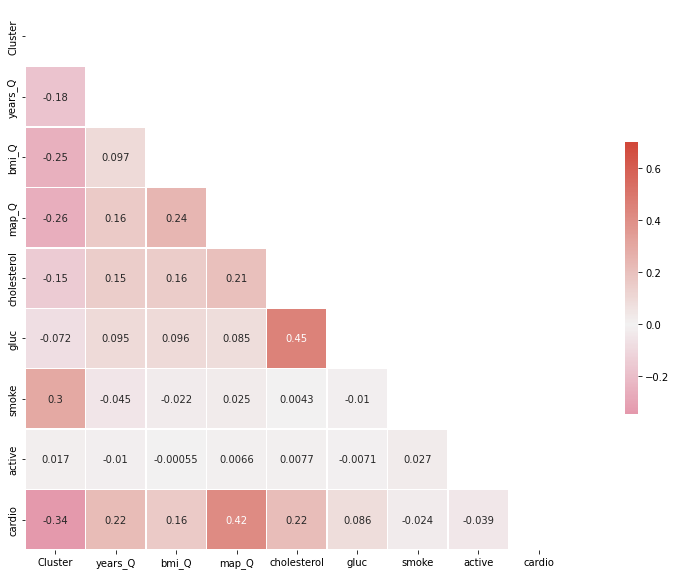

In [ ]:
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

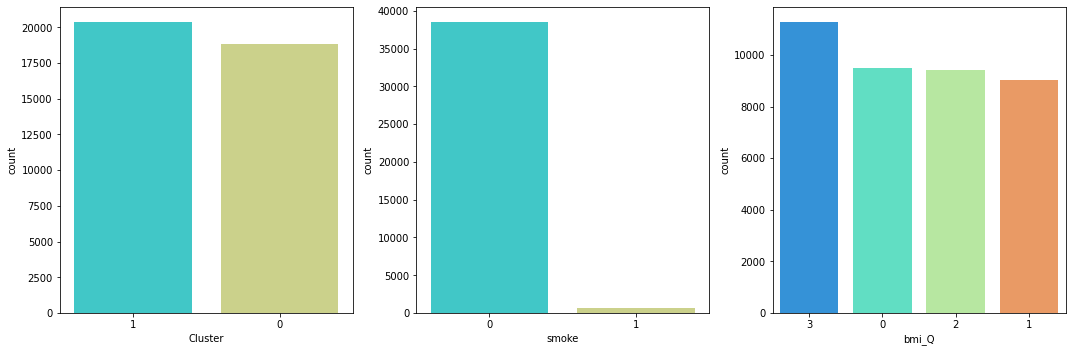

In [ ]:
# countplot() method is used to Show the counts of observations in each categorical bin using bars.
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_female_km['Cluster'],order=df_female_km['Cluster'].value_counts().index,ax=axs[0],palette='rainbow')
sns.countplot(x=df_female_km['smoke'],order=df_female_km['smoke'].value_counts().index,ax=axs[1],palette='rainbow')
sns.countplot(x=df_female_km['bmi_Q'],order=df_female_km['bmi_Q'].value_counts().index,ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

In [ ]:
# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

from sklearn.naive_bayes import GaussianNB

In [ ]:
#provides several common utility functions and transformer classes 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml = df_km.apply(le.fit_transform)
df_ml.describe()

,male,female,years_Q,bmi_Q,map_Q,cholesterol,gluc,smoke,active,cardio
count,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000,60132.000000
mean,0.347303,0.652697,1.430569,1.495111,0.599182,0.350911,0.220232,0.085595,0.803665,0.488159
std,0.476117,0.476117,1.111749,1.119876,0.800266,0.670020,0.567630,0.279767,0.397228,0.499864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
target_name = 'cardio'
data_target = df_clusters[target_name]
data = df_clusters.drop([target_name], axis=1)

In [ ]:
#separate into 30/70%
train, test, target, target_test = train_test_split(data, data_target, test_size=0.3, random_state=0)

In [ ]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.3, random_state=0)

In [ ]:
#Naive Bayes

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

72.73

In [ ]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

73.09

In [ ]:
diff_gaussian = acc_gaussian - acc_test_gaussian
diff_gaussian

-0.35999999999999943

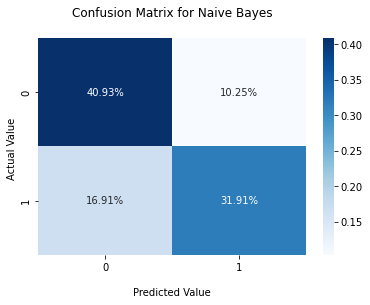

In [ ]:
y_pred_gauss = gaussian.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_gauss)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

In [ ]:
#performance evaluation metric in machine learning which is used to show the precision
print(classification_report(Zval, y_pred_gauss))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6463
           1       0.76      0.65      0.70      6165

    accuracy                           0.73     12628
   macro avg       0.73      0.73      0.73     12628
weighted avg       0.73      0.73      0.73     12628



#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
# the decisions were made based on some conditions

In [ ]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

87.55

In [ ]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

86.39

In [ ]:
diff_decision_tree = acc_decision_tree - acc_test_decision_tree
diff_decision_tree

1.1599999999999966

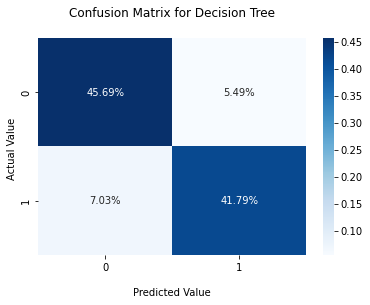

In [ ]:
1.1599999999999966
y_pred_dt = decision_tree.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_dt)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Decision Tree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
print(classification_report(Zval, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6463
           1       0.88      0.86      0.87      6165

    accuracy                           0.87     12628
   macro avg       0.88      0.87      0.87     12628
weighted avg       0.88      0.87      0.87     12628



###Random Forest

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Random Forest
#ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees 

In [ ]:

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

87.55 {'n_estimators': 300}


In [ ]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

86.6

In [ ]:
diff_random_forest = acc_random_forest - acc_test_random_forest
diff_random_forest

0.9500000000000028

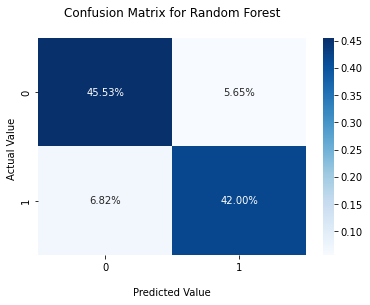

In [ ]:
y_pred_df = random_forest.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_df)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

In [ ]:
print(classification_report(Zval, y_pred_df))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6463
           1       0.88      0.86      0.87      6165

    accuracy                           0.88     12628
   macro avg       0.88      0.88      0.88     12628
weighted avg       0.88      0.88      0.88     12628



In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
#used to calculate or predict the probability of a binary 

In [ ]:

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

76.18

In [ ]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

76.51

In [ ]:
diff_log = acc_log - acc_test_log
diff_log

-0.3299999999999983

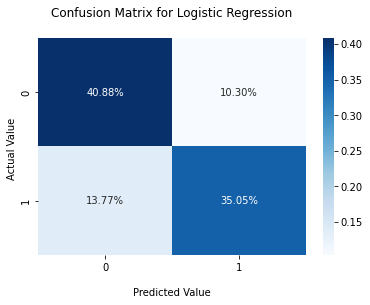

In [ ]:
y_pred_lr = logreg.predict(Xval)

#Get the confusion matrix 
cf_matrix = confusion_matrix(Zval, y_pred_lr)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

In [ ]:
print(classification_report(Zval, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      6463
           1       0.77      0.72      0.74      6165

    accuracy                           0.76     12628
   macro avg       0.76      0.76      0.76     12628
weighted avg       0.76      0.76      0.76     12628



# printing the results

In [ ]:

print("precision for Naive Bayes is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_gaussian,diff_gaussian))
print("precision for Decision Tree is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_decision_tree,diff_decision_tree))
print("precision for Random Forest is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_random_forest,diff_random_forest))
print("precision for Logistic Regression is {0:.2f}% and difference for test and training was {1:.2f}". format(acc_test_log,diff_log))

precision for Naive Bayes is 73.09% and difference for test and training was -0.36
precision for Decision Tree is 86.39% and difference for test and training was 1.16
precision for Random Forest is 86.60% and difference for test and training was 0.95
precision for Logistic Regression is 76.51% and difference for test and training was -0.33
